Mental Health in Tech: People working in tech are often at their desks for extended amounts of time. Explore how this trend correlates with mental health. Examine the data coollected through surveys search for trends. Find out if there is a link between mental health and companies that offer wellness programs. What do the results show you about the state of mental health in tech? Can you suggest steps that companies can take to help their employees?

MAIN QUESTIONS

1.Does remote work affect an individual's mental health more compared to someone who works on site?(self employed VS work in organisation ) (Jane)

2.Do males seek mental health treatments less often than females in tech companies? (Loku)

3.Is mental health more prevalent in different regions?(US) Does US have a bigger issue with mental health compared to other countries?(Keegan)

4.Does mental health interfere with work? (Lishi )(more grouping - split by company size, family history, males/females)


In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Define the path to the CSV file
file_path = Path("/Users/janelu/Project-1_Mental-Health/files/mental_heath_2016.csv")  # Replace 'your_file_name.csv' with the actual file name

# Read the CSV file into a DataFrame
data_df = pd.read_csv(file_path)

# Display the DataFrame
data_df.head()

#print(data_df.columns.tolist())  # This will print a list of the column names

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


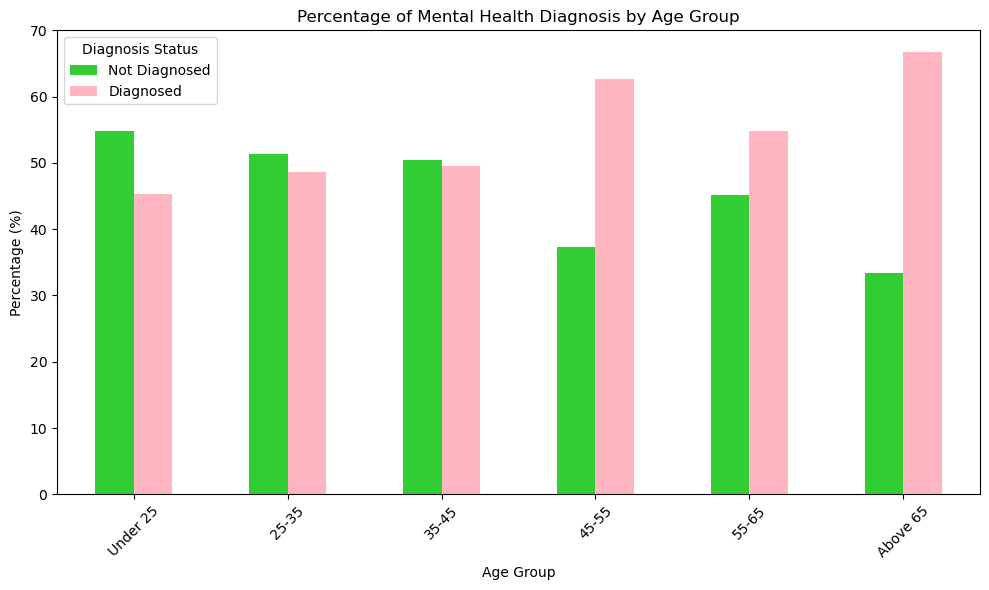

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Define age groups and a function to categorize ages
def categorize_age(age):
    if age < 25:
        return 'Under 25'
    elif 25 <= age < 35:
        return '25-35'
    elif 35 <= age < 45:
        return '35-45'
    elif 45 <= age < 55:
        return '45-55'
    elif 55 <= age < 65:
        return '55-65'
    else:
        return 'Above 65'

# Assuming 'What is your age?' is in numeric format. If it's not, convert it to numeric first.
data_df['Age Group'] = data_df['What is your age?'].apply(categorize_age)

# Convert 'Age Group' to a categorical type with a specified order
age_order = ['Under 25', '25-35', '35-45', '45-55', '55-65', 'Above 65']
data_df['Age Group'] = pd.Categorical(data_df['Age Group'], categories=age_order, ordered=True)

# Count occurrences of each age group and their corresponding diagnosis status
age_diagnosis_counts = data_df.groupby(['Age Group', 'Have you been diagnosed with a mental health condition by a medical professional?'], observed=False).size().unstack(fill_value=0)

# Calculate percentages of diagnosed individuals in each age group
age_diagnosis_percentages = (age_diagnosis_counts.div(age_diagnosis_counts.sum(axis=1), axis=0) * 100)


# Optionally, you can also plot the percentages
age_diagnosis_percentages.plot(kind='bar', figsize=(10, 6), color=['limegreen','lightpink' ])
plt.title('Percentage of Mental Health Diagnosis by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45) 
plt.legend(title='Diagnosis Status', labels=['Not Diagnosed', 'Diagnosed'])

# Show the chart
plt.tight_layout() 
plt.show()


In [ ]:
How do employees perceive their workplace culture regarding mental health?

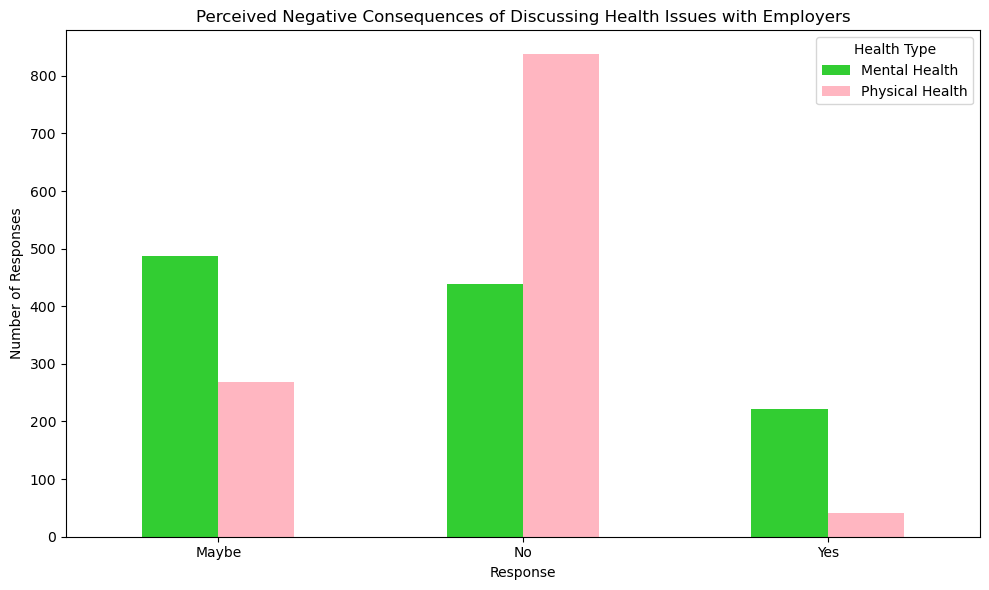

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame is named data_df and contains the necessary columns
# Replace the column names with the exact names in your DataFrame
mental_health_col = 'Do you think that discussing a mental health disorder with your employer would have negative consequences?'
physical_health_col = 'Do you think that discussing a physical health issue with your employer would have negative consequences?'

# Count the occurrences of each response for both questions
mental_health_counts = data_df[mental_health_col].value_counts()
physical_health_counts = data_df[physical_health_col].value_counts()

# Create a DataFrame to hold the counts
comparison_df = pd.DataFrame({
    'Mental Health': mental_health_counts,
    'Physical Health': physical_health_counts
}).fillna(0)  # Fill NaN values with 0

# Plotting the bar chart
comparison_df.plot(kind='bar', figsize=(10, 6), color=['limegreen', 'lightpink'])
plt.title('Perceived Negative Consequences of Discussing Health Issues with Employers')
plt.xlabel('Response')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Health Type')

# Show the chart
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [ ]:
What are the perceived consequences (both positive and negative) of disclosing a mental health disorder to previous employers?

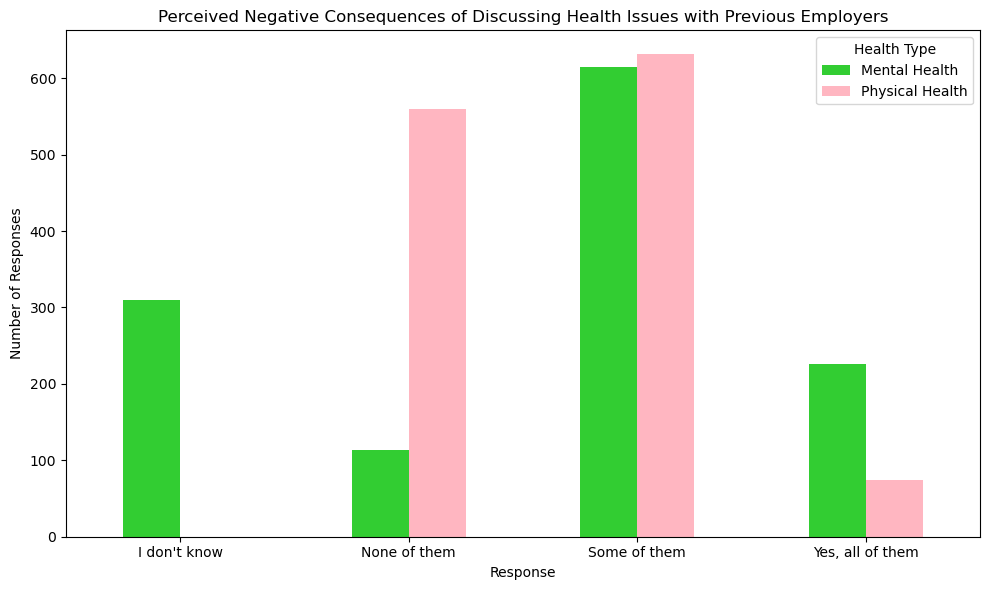

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame is named data_df and contains the necessary columns
# Replace the column names with the exact names in your DataFrame
mental_health_col = 'Do you think that discussing a mental health disorder with previous employers would have negative consequences?'
physical_health_col = 'Do you think that discussing a physical health issue with previous employers would have negative consequences?'

# Count the occurrences of each response for both questions
mental_health_counts = data_df[mental_health_col].value_counts()
physical_health_counts = data_df[physical_health_col].value_counts()

# Create a DataFrame to hold the counts
comparison_df = pd.DataFrame({
    'Mental Health': mental_health_counts,
    'Physical Health': physical_health_counts
}).fillna(0)  # Fill NaN values with 0

# Plotting the bar chart
comparison_df.plot(kind='bar', figsize=(10, 6), color=['limegreen', 'lightpink'])
plt.title('Perceived Negative Consequences of Discussing Health Issues with Previous Employers')
plt.xlabel('Response')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Health Type')

# Show the chart
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [ ]:
How do potential candidates approach the topic of mental health in job interviews, and what fears or concerns do they have about such discussions?

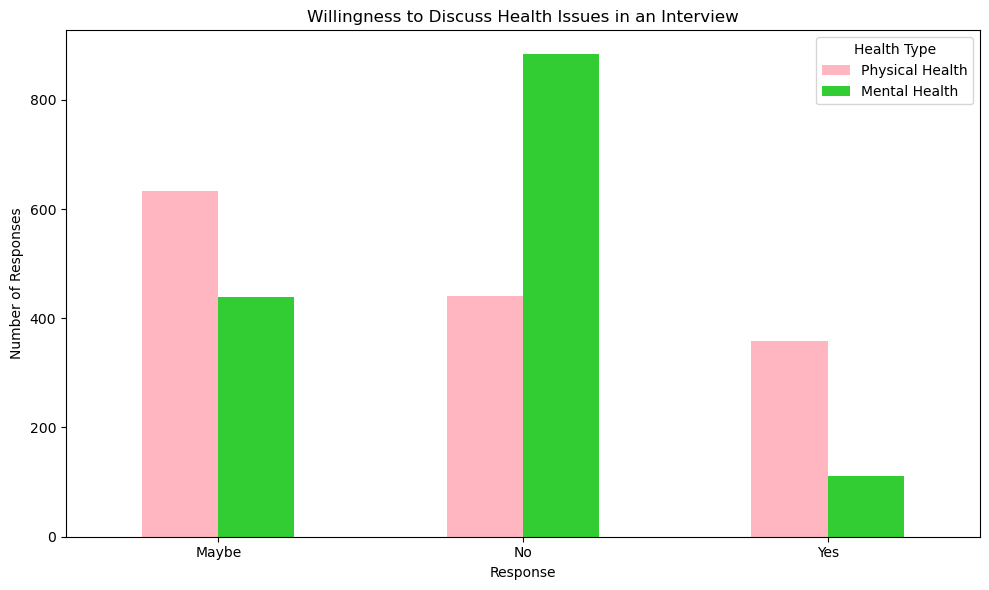

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame is named data_df and contains the necessary columns
# Replace the column names with the exact names in your DataFrame
physical_health_col = 'Would you be willing to bring up a physical health issue with a potential employer in an interview?'
mental_health_col = 'Would you bring up a mental health issue with a potential employer in an interview?'

# Count the occurrences of each response for both questions
physical_health_counts = data_df[physical_health_col].value_counts()
mental_health_counts = data_df[mental_health_col].value_counts()

# Create a DataFrame to hold the counts
comparison_df = pd.DataFrame({
    'Physical Health': physical_health_counts,
    'Mental Health': mental_health_counts
}).fillna(0)  # Fill NaN values with 0

# Plotting the bar chart
comparison_df.plot(kind='bar', figsize=(10, 6), color=['lightpink','limegreen' ])
plt.title('Willingness to Discuss Health Issues in an Interview')
plt.xlabel('Response')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Health Type')

# Show the chart
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
